In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [10]:
file_path_train_data = "./nsl/KDDTrain+.txt"
file_path_test_data = "./nsl/KDDTest+.txt"

In [11]:
train_df = pd.read_csv(file_path_train_data)
test_df = pd.read_csv(file_path_test_data)

Adding column names to dataframe (extracted from KDD.arff file)

In [12]:
column_names = ([
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'attack',
    'level'
])

In [13]:
train_df.columns = column_names
test_df.columns = column_names
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [14]:
# shape of the training dataset
train_df.shape

(125972, 43)

Adding attack_flag to dataframe so that we will be able to classify attacks (here we will test dataset for binary classification)

In [15]:
train_df["attack_flag"] = train_df["attack"].map(lambda x: 0 if x=="normal" else 1)
test_df["attack_flag"] = test_df["attack"].map(lambda x: 0 if x=="normal" else 1)

In [16]:
train_df.head()
# test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


4 major attacks have been described in the KDD dataset

In [17]:
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack',
                  'snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [18]:
def get_attack_num(attack):
    if attack in dos_attacks:
        return 1
    elif attack in probe_attacks:
        return 2
    elif attack in privilege_attacks:
        return 3
    elif attack in access_attacks:
        return 4
    # map to normal
    return 0

In [19]:
# apply to training data
attack_map = train_df["attack"].apply(get_attack_num)
train_df["attack_map"] = attack_map

# apply to testing data
attack_map = test_df["attack"].apply(get_attack_num)
test_df["attack_map"] = attack_map

In [20]:
print("dimensions =", train_df.shape)
train_df.head()

dimensions = (125972, 45)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


# Attack vs Protocol

In [21]:
cross_table = pd.crosstab(train_df["attack"], train_df["protocol_type"])
# type(cross_table)
cross_table

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [22]:
cross_table.index.values

array(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype=object)

In [23]:
# plt.rcParams["figure.figsize"] = [8, 12]
# plt.rcParams["figure.autolayout"] = True
plt.rcdefaults()

Attack vs Protocol: ICMP

In [24]:
icmp_df = cross_table["icmp"].replace(0, pd.np.nan).dropna(axis=0, how="any").fillna(0).astype(int)
icmp_df = icmp_df.drop("normal")
print(icmp_df)
print("total attacks on ICMP: ", len(icmp_df))

attack
ipsweep      3117
nmap          981
pod           201
portsweep       5
satan          32
smurf        2646
Name: icmp, dtype: int32
total attacks on ICMP:  6


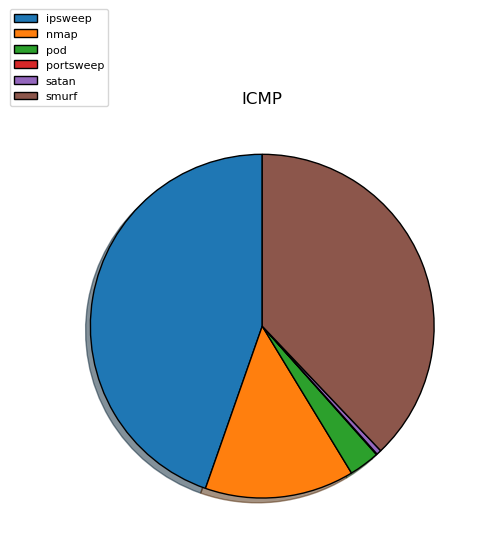

In [26]:
# plotting pie chart for ICMP
slices = icmp_df.values
labels = icmp_df.index.values
# plt.style.use("fivethirtyeight")
plt.pie(slices, shadow=True, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("ICMP")
plt.tight_layout()
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.show()

Attack vs Protocol: TCP

In [27]:
tcp_df = cross_table["tcp"].replace(0, pd.np.nan).dropna(axis=0, how="any").fillna(0).astype(int)
tcp_df = tcp_df.drop("normal")
print(tcp_df)
print("total attacks on TCP: ", len(tcp_df))

attack
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep              482
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                 265
perl                   3
phf                    4
portsweep           2926
rootkit                7
satan               2184
spy                    2
warezclient          890
warezmaster           20
Name: tcp, dtype: int32
total attacks on TCP:  19


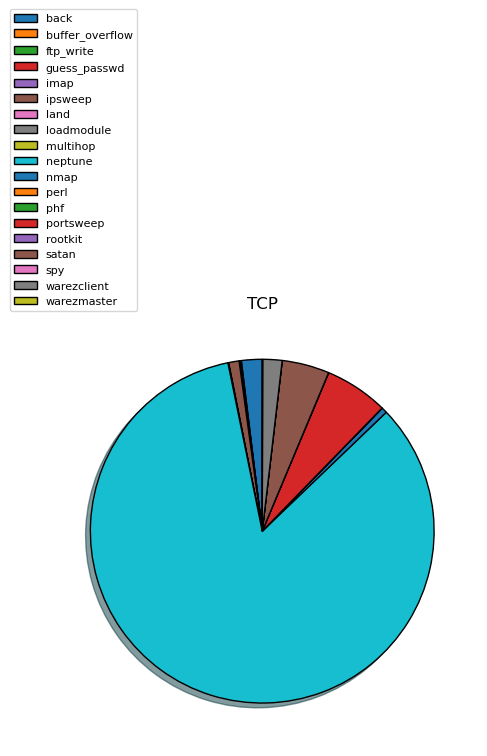

In [29]:
# plotting pie chart for ICMP
slices = tcp_df.values
labels = tcp_df.index.values
# plt.style.use("fivethirtyeight")
plt.pie(slices, shadow=True, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("TCP")
plt.tight_layout()
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.show()

Attack vs Protocol: UDP

In [30]:
udp_df = cross_table["udp"].replace(0, pd.np.nan).dropna(axis=0, how="any").fillna(0).astype(int)
udp_df = udp_df.drop("normal")
print(udp_df)
print("total attacks on UDP: ", len(udp_df))

attack
nmap         247
rootkit        3
satan       1417
teardrop     892
Name: udp, dtype: int32
total attacks on UDP:  4


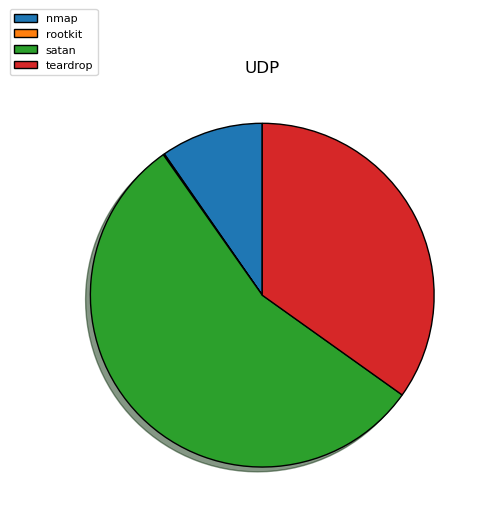

In [32]:
# plotting pie chart for ICMP
slices = udp_df.values
labels = udp_df.index.values
# plt.style.use("fivethirtyeight")
plt.pie(slices, shadow=True, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("UDP")
plt.tight_layout()
plt.legend(labels, loc='lower left', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.show()

# Attack vs Flag

Analyzing "flag" attribute under normal and attack scenario

In [33]:
train_df["attack_flag"].unique()

array([0, 1], dtype=int64)

In [34]:
train_df["flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [35]:
normal_flags = train_df.loc[train_df["attack_flag"] == 0].flag.value_counts()
normal_flags

SF      63392
REJ      2693
S1        361
S0        354
RSTO      219
RSTR      146
S2        119
S3         45
OTH        11
SH          2
Name: flag, dtype: int64

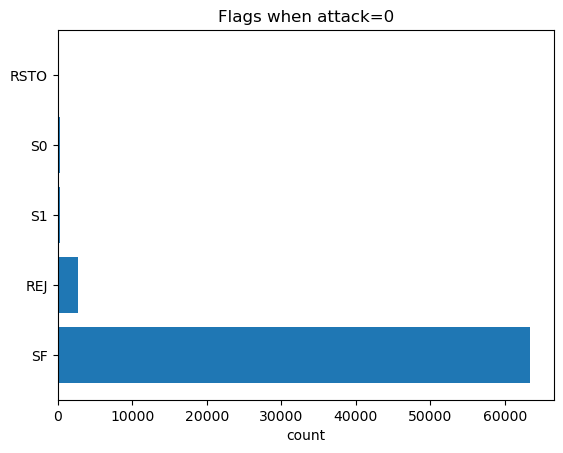

In [36]:
# plotting top 5 flags using bar graphs
slices = normal_flags.values[:5]
labels = normal_flags.index.values[:5]
plt.barh(labels, slices)
plt.xlabel("count")
plt.title("Flags when attack=0")
plt.show()

In [37]:
attack_flags = train_df.loc[train_df["attack_flag"] == 1].flag.value_counts()
attack_flags

S0        34497
SF        11552
REJ        8540
RSTR       2275
RSTO       1343
SH          269
RSTOS0      103
OTH          35
S2            8
S3            4
S1            4
Name: flag, dtype: int64

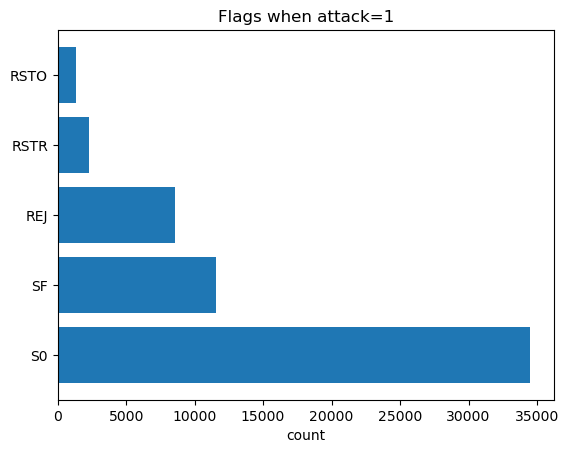

In [38]:
# plotting top 5 flags using bar graphs
slices = attack_flags.values[:5]
labels = attack_flags.index.values[:5]
plt.barh(labels, slices)
plt.xlabel("count")
plt.title("Flags when attack=1")
plt.show()

# Attack vs Service

Analyzing "service" attribute under normal and attack scenario

In [39]:
train_df["service"].unique()

array(['other', 'private', 'http', 'remote_job', 'ftp_data', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [40]:
normal_services = train_df.loc[train_df.attack_flag == 0].service.value_counts()
normal_services

http        38049
domain_u     9034
smtp         7029
ftp_data     4983
other        2604
private       982
ftp           918
telnet        917
urp_i         599
finger        545
eco_i         497
auth          236
ecr_i         190
IRC           186
pop_3         186
ntp_u         168
time           76
X11            67
domain         38
urh_i          10
red_i           8
tim_i           5
ssh             5
shell           4
imap4           3
tftp_u          3
Name: service, dtype: int64

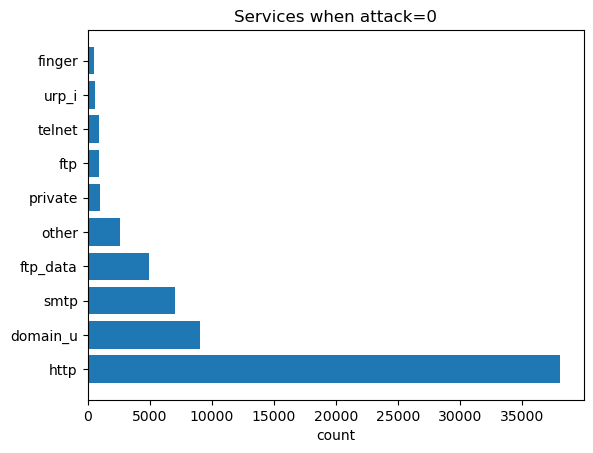

In [41]:
# plotting top 10 services using bar graphs
slices = normal_services.values[:10]
labels = normal_services.index.values[:10]
plt.barh(labels, slices)
plt.xlabel("count")
plt.title("Services when attack=0")
plt.show()

In [42]:
attack_services = train_df.loc[train_df.attack_flag == 1].service.value_counts()
attack_services[:20]

private      20871
eco_i         4089
ecr_i         2887
http          2289
ftp_data      1876
other         1755
telnet        1436
finger        1222
Z39_50         862
ftp            836
uucp           780
courier        734
auth           719
bgp            710
whois          693
uucp_path      689
iso_tsap       687
imap4          644
nnsp           630
vmnet          617
Name: service, dtype: int64

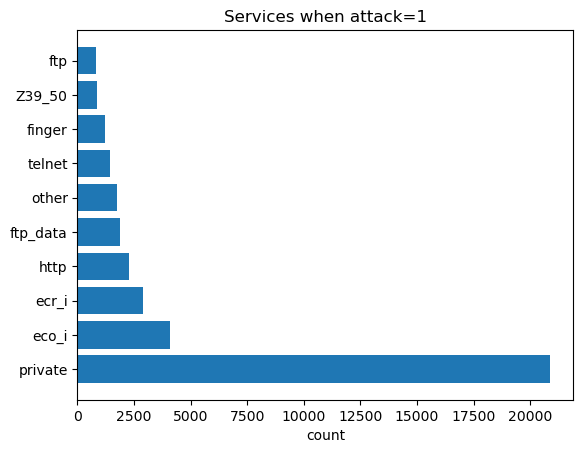

In [43]:
# plotting top 10 services using bar graphs
slices = attack_services.values[:10]
labels = attack_services.index.values[:10]
plt.barh(labels, slices)
plt.xlabel("count")
plt.title("Services when attack=1")
plt.show()

# Feature Selection

In [45]:
from sklearn.feature_selection import mutual_info_classif

In [46]:
train_df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
31991,0,tcp,http,SF,205,16702,0,0,0,0,...,0.10,0.03,0.00,0.0,0.00,0.0,normal,21,0,0
20298,0,icmp,eco_i,SF,30,0,0,0,0,0,...,0.07,0.00,0.00,0.0,0.00,0.0,normal,19,0,0
116779,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.0,neptune,21,1,1
76587,0,tcp,discard,RSTO,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.0,neptune,20,1,1
43277,0,tcp,private,REJ,0,0,0,0,0,0,...,0.61,0.00,0.00,0.0,0.61,1.0,portsweep,18,1,2
9122,0,tcp,http,SF,279,296,0,0,0,0,...,0.03,0.04,0.00,0.0,0.00,0.0,normal,21,0,0
79113,2,tcp,ftp_data,SF,2194619,0,0,0,0,0,...,0.28,0.00,0.01,0.0,0.00,0.0,normal,18,0,0
34106,0,tcp,csnet_ns,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.0,0.00,0.0,neptune,21,1,1
14673,0,tcp,http,SF,225,668,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.0,normal,21,0,0
98306,0,tcp,http,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.0,0.00,0.0,neptune,20,1,1


In [47]:
# Y = train_df["attack_map"]
# X = train_df
# imp = mutual_info_classif(X, Y)
# feat_imp = pd.Series(imp, train_df.columns)
# feat_imp.plot(kind="barh")
# ple.show()

# Using Random Forest

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

In [49]:
print("training data = ", train_df.shape)
print("testing data = ", test_df.shape)

training data =  (125972, 45)
testing data =  (22543, 45)


In [50]:
encode_features = ["protocol_type", "service", "flag"]
encode_train = pd.get_dummies(train_df[encode_features])
encode_train.sample(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
51258,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
36617,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12474,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
80926,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
67521,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
encode_test = pd.get_dummies(test_df[encode_features])
encode_test.sample(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
21361,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21455,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18554,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2984,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21507,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
# finding difference in the test dataset
test_index = np.arange(len(test_df.index))
col_diff = list(set(encode_train.columns.values)-set(encode_test.columns.values))
col_diff

['service_http_2784',
 'service_harvest',
 'service_red_i',
 'service_http_8001',
 'service_urh_i',
 'service_aol']

In [53]:
diff_df = pd.DataFrame(0, index=test_index, columns=col_diff)
diff_df.sample(5)

,service_http_2784,service_harvest,service_red_i,service_http_8001,service_urh_i,service_aol
8368,0,0,0,0,0,0
7152,0,0,0,0,0,0
3100,0,0,0,0,0,0
19995,0,0,0,0,0,0
11732,0,0,0,0,0,0


In [54]:
# reorder the columns to match, append new columns and recorder the columns again
column_order = encode_train.columns.to_list()
encode_test = encode_test.join(diff_df)
encode_test = encode_test[column_order].fillna(0)

In [55]:
numeric_features = ['duration', 'src_bytes', 'dst_bytes']
final_train = encode_train.join(train_df[numeric_features])
final_train.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,146,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,232,8153
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,199,420
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
final_test = encode_test.join(test_df[numeric_features])
final_test.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,duration,src_bytes,dst_bytes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,12983,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,20,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,15
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,267,14515


In [57]:
# attack_map for multi-class classification & attack_flag for binary classification
train_out = train_df["attack_map"]
test_out = test_df["attack_map"]

In [58]:
# get training and validation data
X_train, X_val_test, Y_train, Y_val_test = train_test_split(final_train, train_out, test_size=0.3, shuffle=True)

In [59]:
model = RandomForestClassifier()
start_time = time.time()
model.fit(X_train, Y_train)
total_time = time.time() - start_time
print("===> model trained in %.3f seconds" % total_time)
predictions = model.predict(X_val_test)
model_val_score = accuracy_score(predictions, Y_val_test) * 100
print("Validation accuracy => {:.3f}%".format(model_val_score))

===> model trained in 6.329 seconds
Validation accuracy => 97.624%


In [60]:
predictions = model.predict(final_test)
model_score = accuracy_score(predictions, test_out) * 100
print("Validation accuracy => {:.3f}%".format(model_score))

Validation accuracy => 73.198%
